### Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data and clustering.
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# from src.exception import CustomException
# import sys

# 2. Understanding the data
- The dataset was collected from kaggle: https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk
- The dataset makes part of the UCI Machine Learning repository.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project Credit Risk 4/german_credit_data (3).csv')
# Dropping useless column.
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### Data dictionary
<b>1. Age</b> (numeric)<br>
<b>2. Sex</b> (text: male, female)<br>
<b>3. Job</b> (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>4. Housing</b> (text: own, rent, or free)<br>
<b>5. Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>6. Checking account</b> (numeric, in DM - Deutsch Mark)<br>
<b>7. Credit amount</b> (numeric, in DM)<br>
<b>8. Duration</b> (numeric, in month)<br>
<b>9. Purpose</b> (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)<br>
<b>10. Risk</b> (text: target, good risk and bad risk)<br>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 1000 rows and 10 columns.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [ ]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Risk'] = df['Risk'].map({'bad': 1, 'good': 0})
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [ ]:
X = df.drop(columns=['Risk'])
y = df['Risk'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (800, 9).
Train target dataset shape: (800,).
Test predictor dataset shape: (200, 9).
Test target dataset shape: (200,).


In [ ]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
Risk
0    0.7
1    0.3
Name: proportion, dtype: float64

Test target proportion: 
Risk
0    0.7
1    0.3
Name: proportion, dtype: float64


The target proportion of each class is preserved.

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
828,47,1,2,free,NaN,little,8335,36,car,1
997,38,1,2,own,little,NaN,804,12,radio/TV,0
148,28,1,2,own,little,little,5371,36,furniture/equipment,0
735,29,0,0,own,NaN,moderate,3990,36,domestic appliances,0
130,24,0,2,own,NaN,moderate,8487,48,car,0


In [ ]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('object').columns.tolist()
target = 'Risk'

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')

There are 5 numerical features. They are: 
['Age', 'Sex', 'Job', 'Credit amount', 'Duration']

There are 4 categorical features. They are: 
['Housing', 'Saving accounts', 'Checking account', 'Purpose']

The target feature is: Risk.


In [ ]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {train[feature].nunique()} unique values. They are: ')
    print(train[feature].value_counts(normalize=True))
    print()

Housing
----------------------------------------
There are 3 unique values. They are: 
Housing
own     0.7125
rent    0.1800
free    0.1075
Name: proportion, dtype: float64

Saving accounts
----------------------------------------
There are 4 unique values. They are: 
Saving accounts
little        0.724085
moderate      0.137195
quite rich    0.076220
rich          0.062500
Name: proportion, dtype: float64

Checking account
----------------------------------------
There are 3 unique values. They are: 
Checking account
little      0.452479
moderate    0.442149
rich        0.105372
Name: proportion, dtype: float64

Purpose
----------------------------------------
There are 8 unique values. They are: 
Purpose
car                    0.34750
radio/TV               0.26875
furniture/equipment    0.18625
business               0.09875
education              0.05625
repairs                0.02250
domestic appliances    0.01250
vacation/others        0.00750
Name: proportion, dtype: float64



### Target distribution

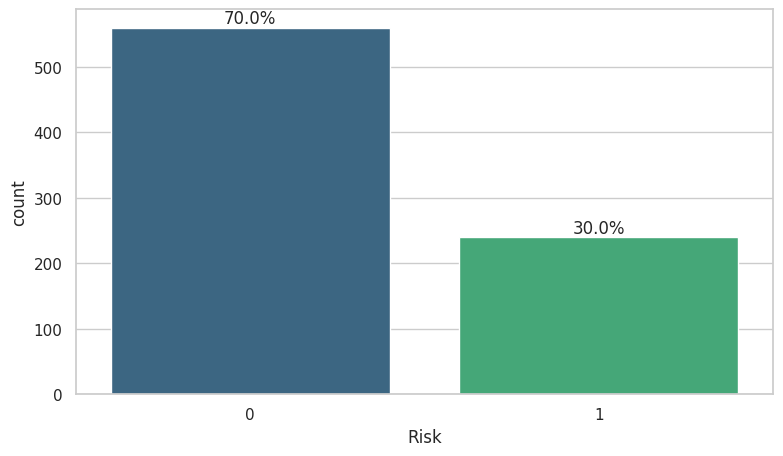

In [ ]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=train, x='Risk', palette='viridis')

total = len(train)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    x = count.get_x() + count.get_width() / 2
    y = count.get_height()
    ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='bottom')
plt.show()

In [ ]:
def sns_plots(data, features, histplot=True, countplot=False,
              barplot=False, barplot_y=None, boxplot=False,
              boxplot_x=None, outliers=False, kde=False,
              hue=None):
    '''
    Generate Seaborn plots for visualization.
    '''

    try:
        num_features = len(features)
        num_rows = num_features // 3 + (num_features % 3 > 0)

        fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5*num_rows))

        for i, feature in enumerate(features):
            row = i // 3
            col = i % 3

            ax = axes[row, col] if num_rows > 1 else axes[col]

            if countplot:
                sns.countplot(data=data, x=feature, hue=hue, ax=ax, palette='viridis')
            elif barplot:
                sns.barplot(data=data, x=feature, y=barplot_y, hue=hue, ax=ax, palette='viridis')
            elif boxplot:
                sns.boxplot(data=data, x=boxplot_x, y=feature, showfliers=outliers, ax=ax, palette='viridis')
            elif outliers:
                sns.boxplot(data=data, x=feature, ax=ax, palette='viridis')
            else:
                sns.histplot(data=data, x=feature, hue=hue, kde=kde, ax=ax, palette='viridis')

            ax.set_title(feature)
            ax.set_xlabel('')

        if num_features < len(axes.flat):
            for j in range(num_features, len(axes.flat)):
                fig.delaxes(axes.flat[j])

        plt.tight_layout()

    except Exception as e:
        raise CustomException(e, sys)

### Numerical features distributions


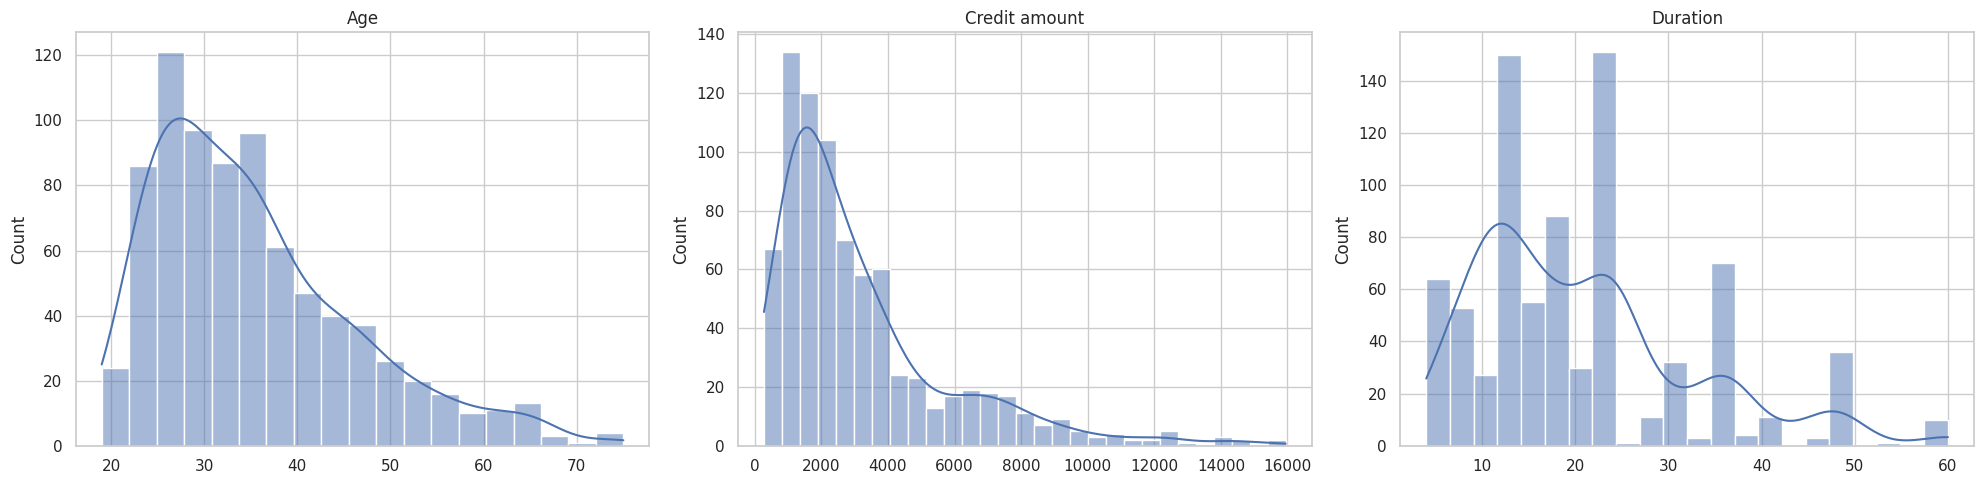

In [ ]:
histplot_boxplot_features = ['Age', 'Credit amount', 'Duration']

sns_plots(data=train, features=histplot_boxplot_features, histplot=True, kde=True)

### Outliers

In [ ]:
def check_outliers(data, features):
    '''
    Check for outliers in the given dataset features.
    '''

    try:

        outlier_counts = {}
        outlier_indexes = {}
        total_outliers = 0

        for feature in features:
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            feature_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
            outlier_indexes[feature] = feature_outliers.index.tolist()
            outlier_count = len(feature_outliers)
            outlier_counts[feature] = outlier_count
            total_outliers += outlier_count

        print(f'There are {total_outliers} outliers in the dataset.')
        print()
        print(f'Number (percentage) of outliers per feature: ')
        print()
        for feature, count in outlier_counts.items():
            print(f'{feature}: {count} ({round(count/len(data)*100, 2)})%')

        return outlier_indexes, outlier_counts, total_outliers

    except Exception as e:
        raise CustomException(e, sys)

In [ ]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=train, features=histplot_boxplot_features)

There are 133 outliers in the dataset.

Number (percentage) of outliers per feature: 

Age: 25 (3.12)%
Credit amount: 58 (7.25)%
Duration: 50 (6.25)%


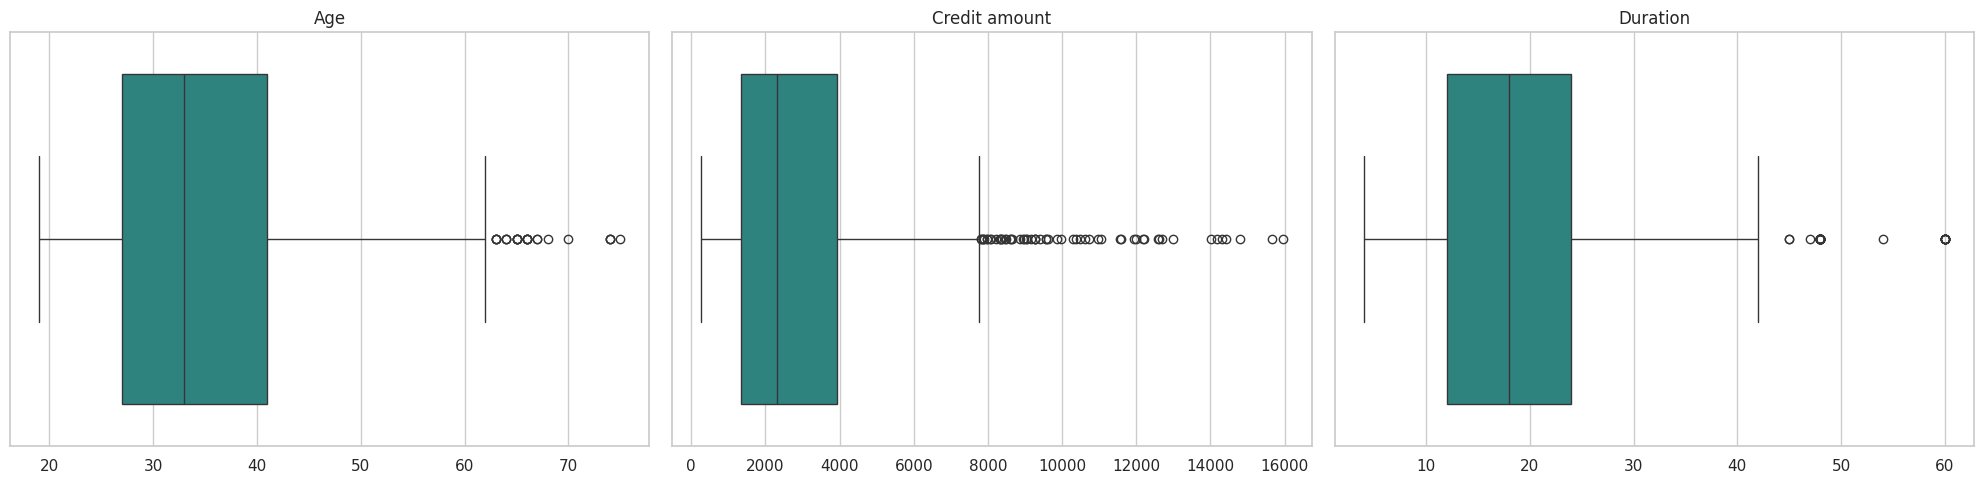

In [ ]:
sns_plots(data=train, features=histplot_boxplot_features, outliers=True)

### Categorical features distributions

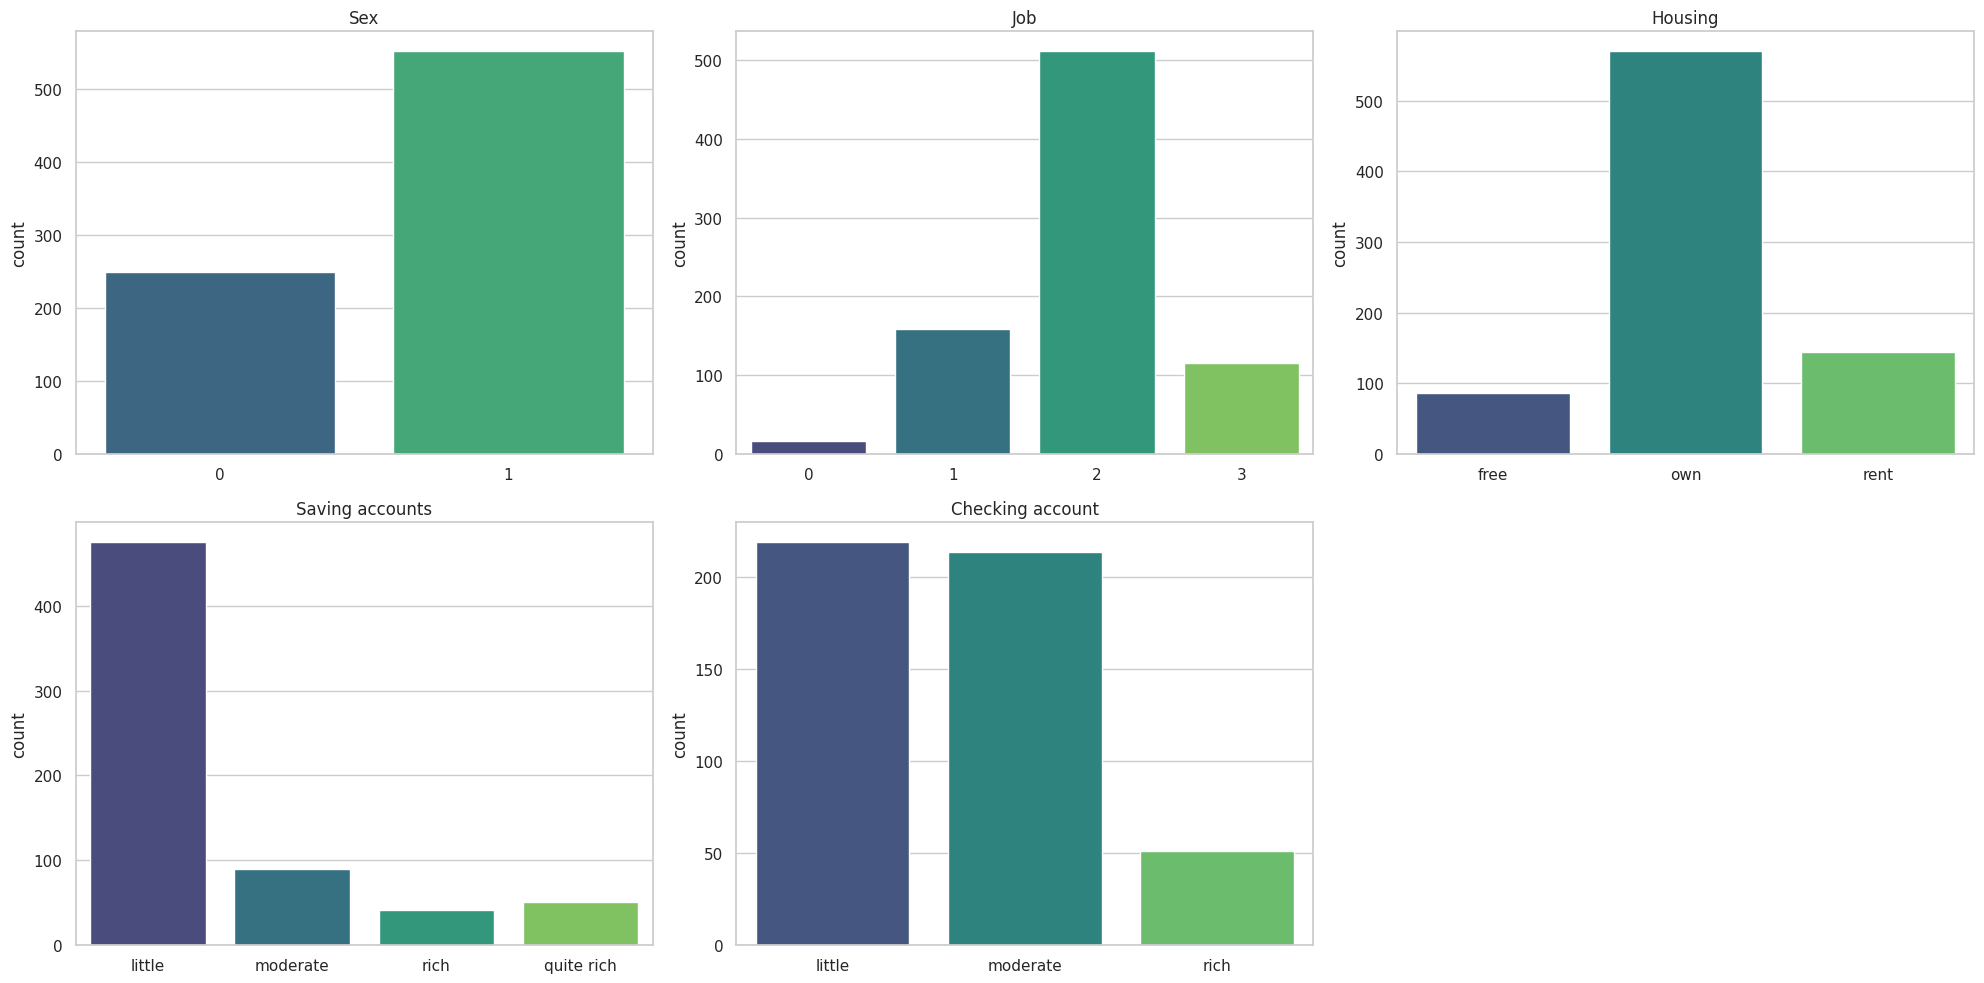

In [ ]:
countplot_barplot_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account']

sns_plots(data=train, features=countplot_barplot_features, countplot=True)

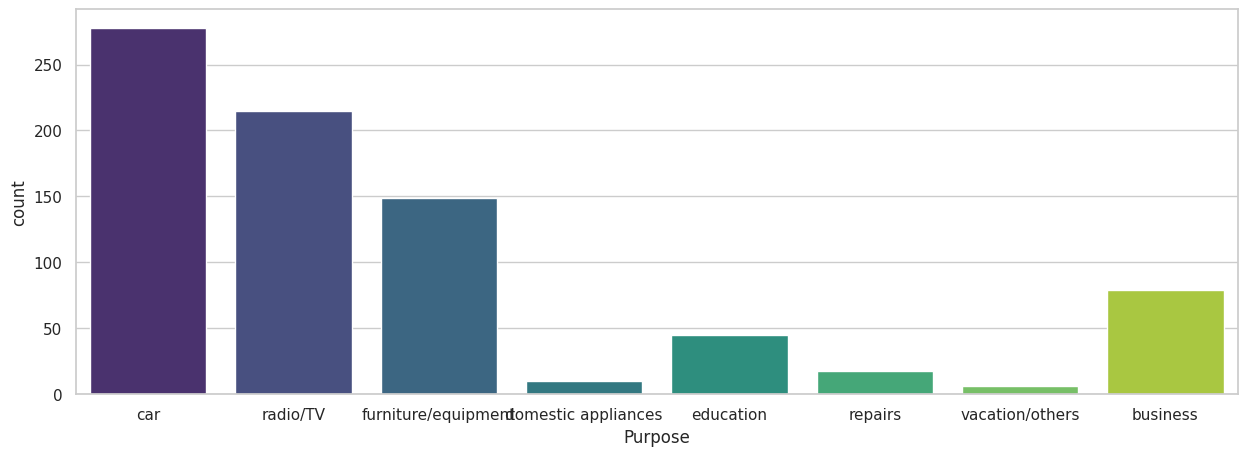

In [ ]:
# Plotting purpose separately.
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=train, x='Purpose', palette='viridis')
plt.show()

In [ ]:
corr_matrix = train.corr(numeric_only=True)

In [ ]:
corr_matrix['Risk'].sort_values(ascending=False)

Risk             1.000000
Duration         0.206301
Credit amount    0.138776
Job              0.019113
Age             -0.057750
Sex             -0.084246
Name: Risk, dtype: float64

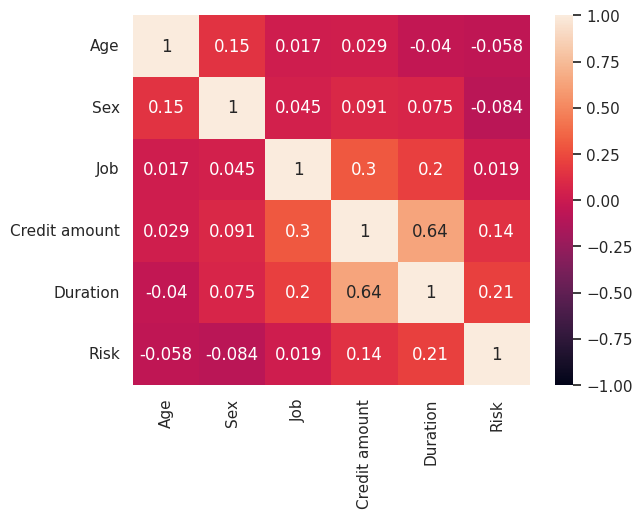

In [ ]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

### Pairplot

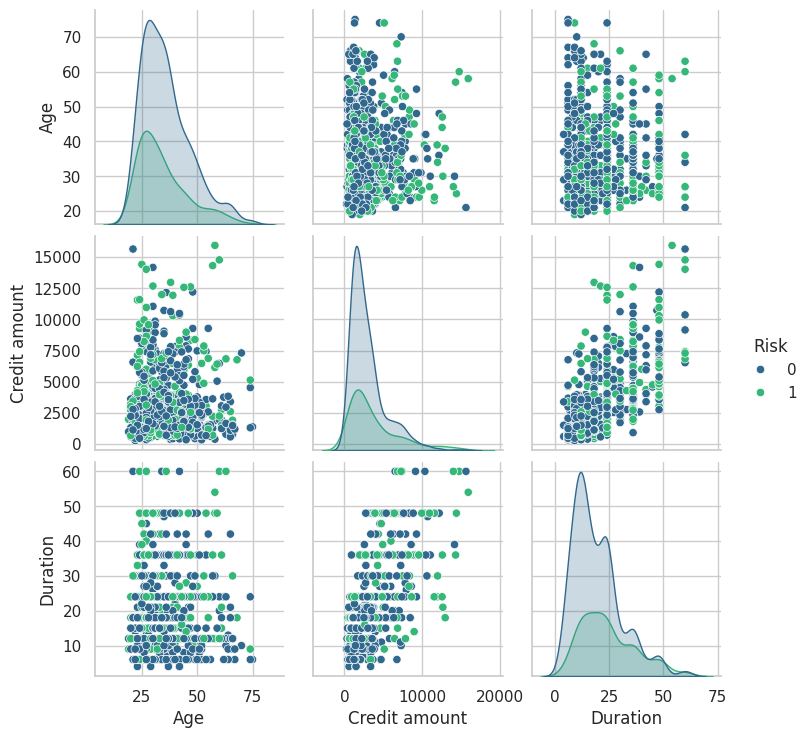

In [ ]:
sns.pairplot(data=train, hue='Risk', vars=histplot_boxplot_features, palette='viridis')
plt.show()

### Numerical features vs Risk

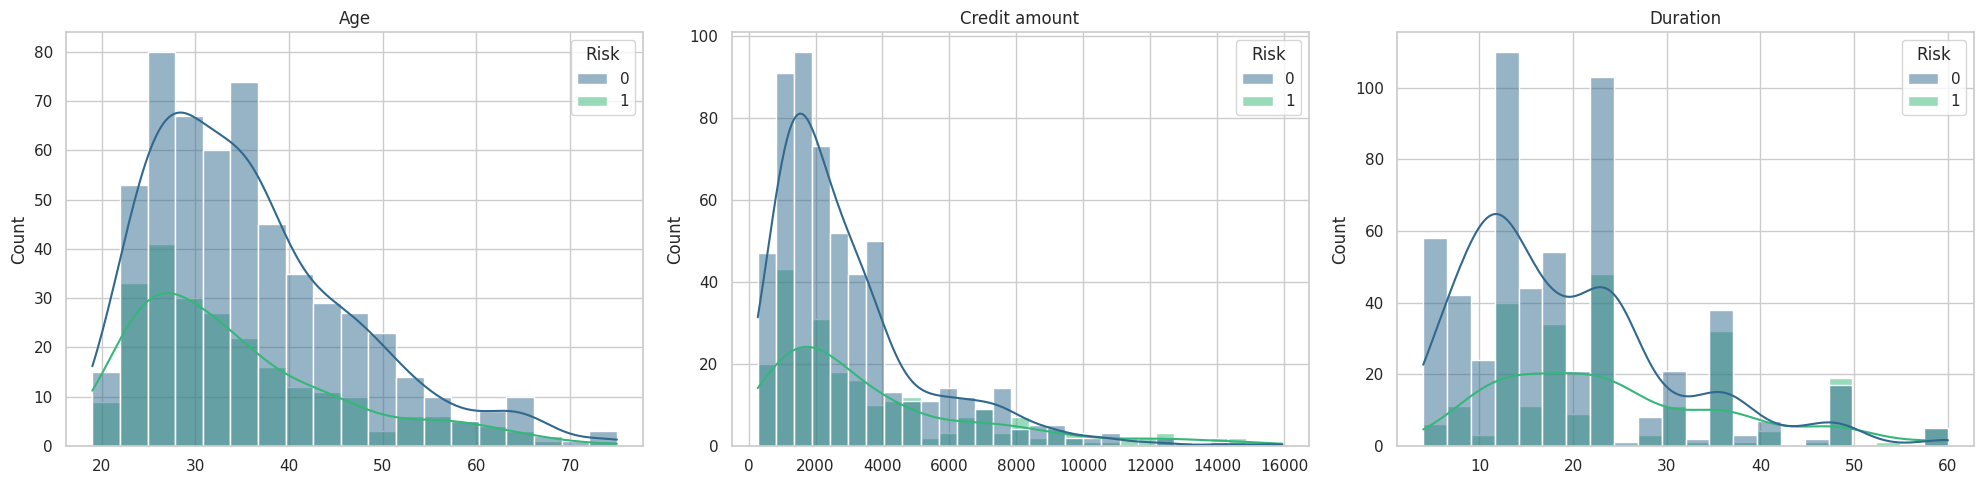

In [ ]:
sns_plots(data=train, features=histplot_boxplot_features, histplot=True, kde=True, hue=target)

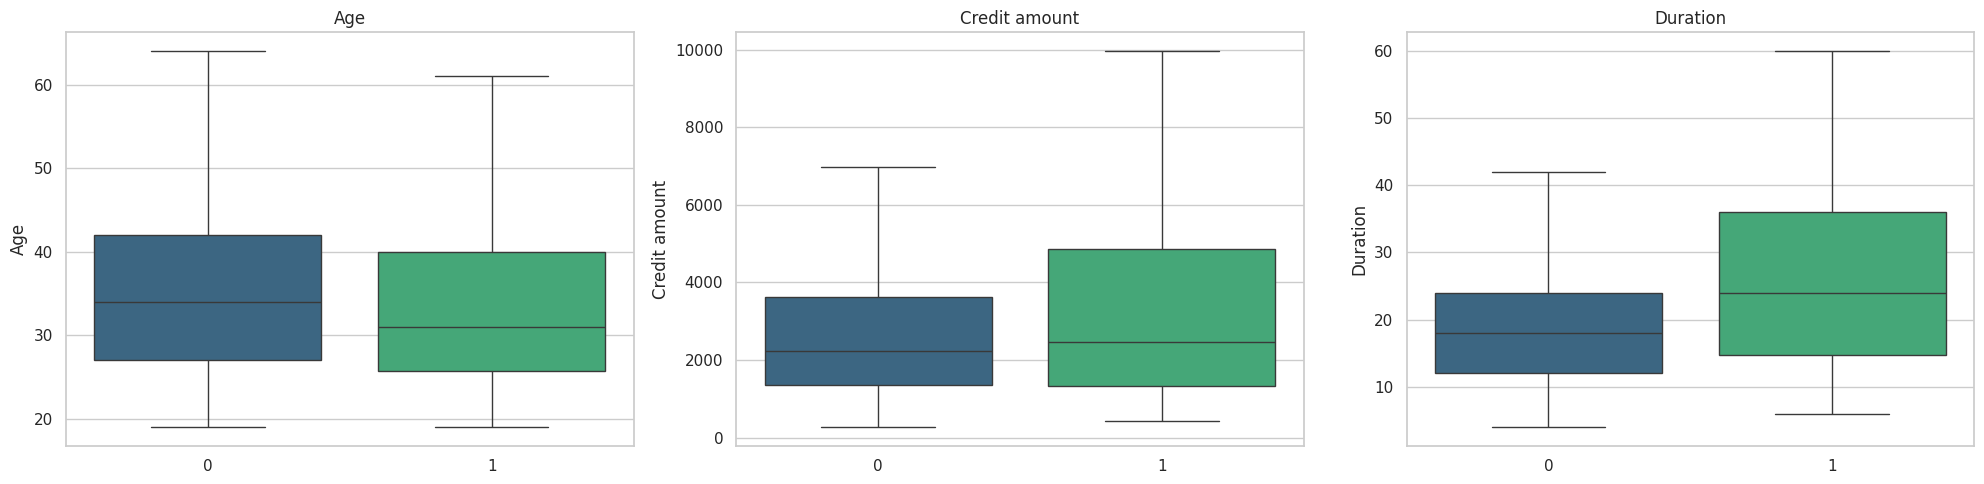

In [ ]:
sns_plots(data=train, features=histplot_boxplot_features, boxplot=True, boxplot_x=target)

### Categorical features vs Risk

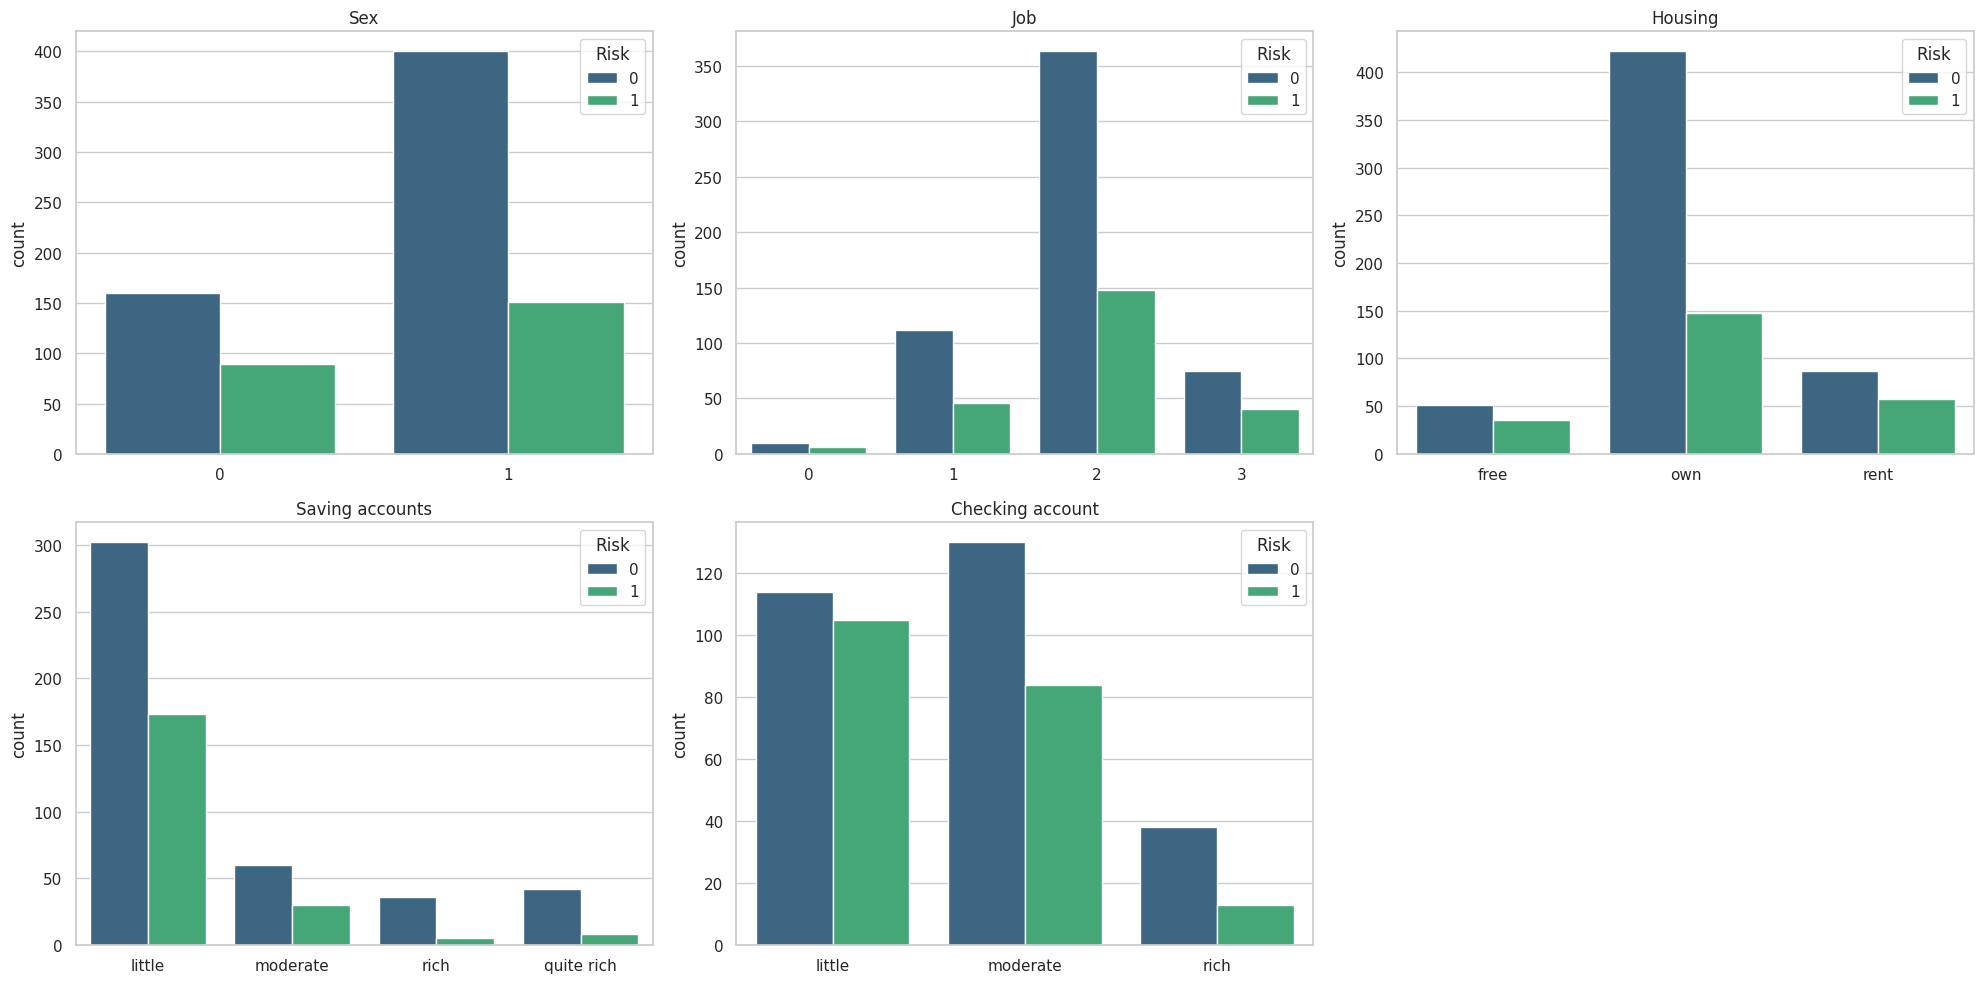

In [ ]:
sns_plots(data=train, features=countplot_barplot_features, countplot=True, hue=target)

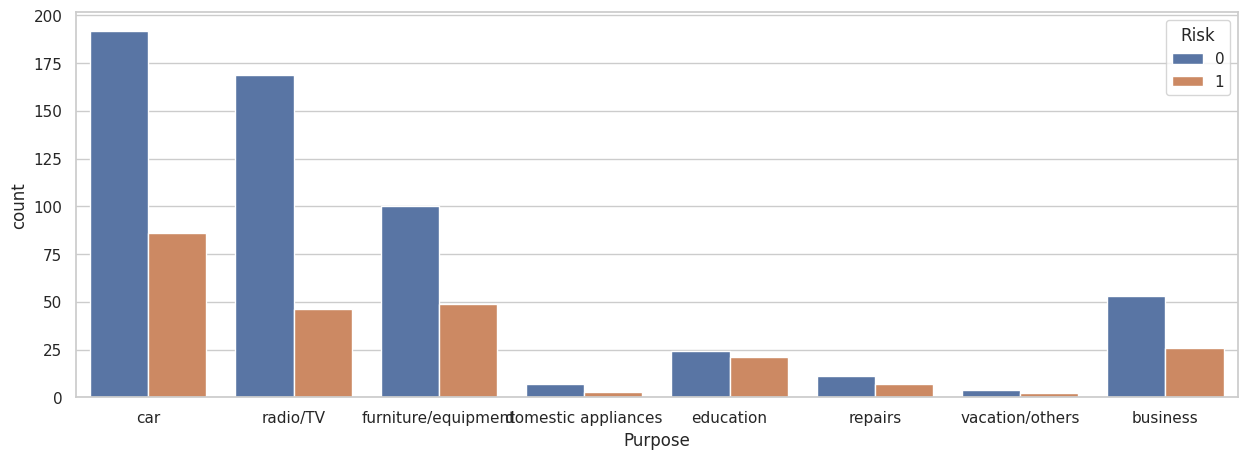

In [ ]:
# Plotting Purpose separately.
plt.figure(figsize=(15, 5))
sns.countplot(data=train, x='Purpose', hue='Risk')
plt.show()

### Categorical features vs Credit amount

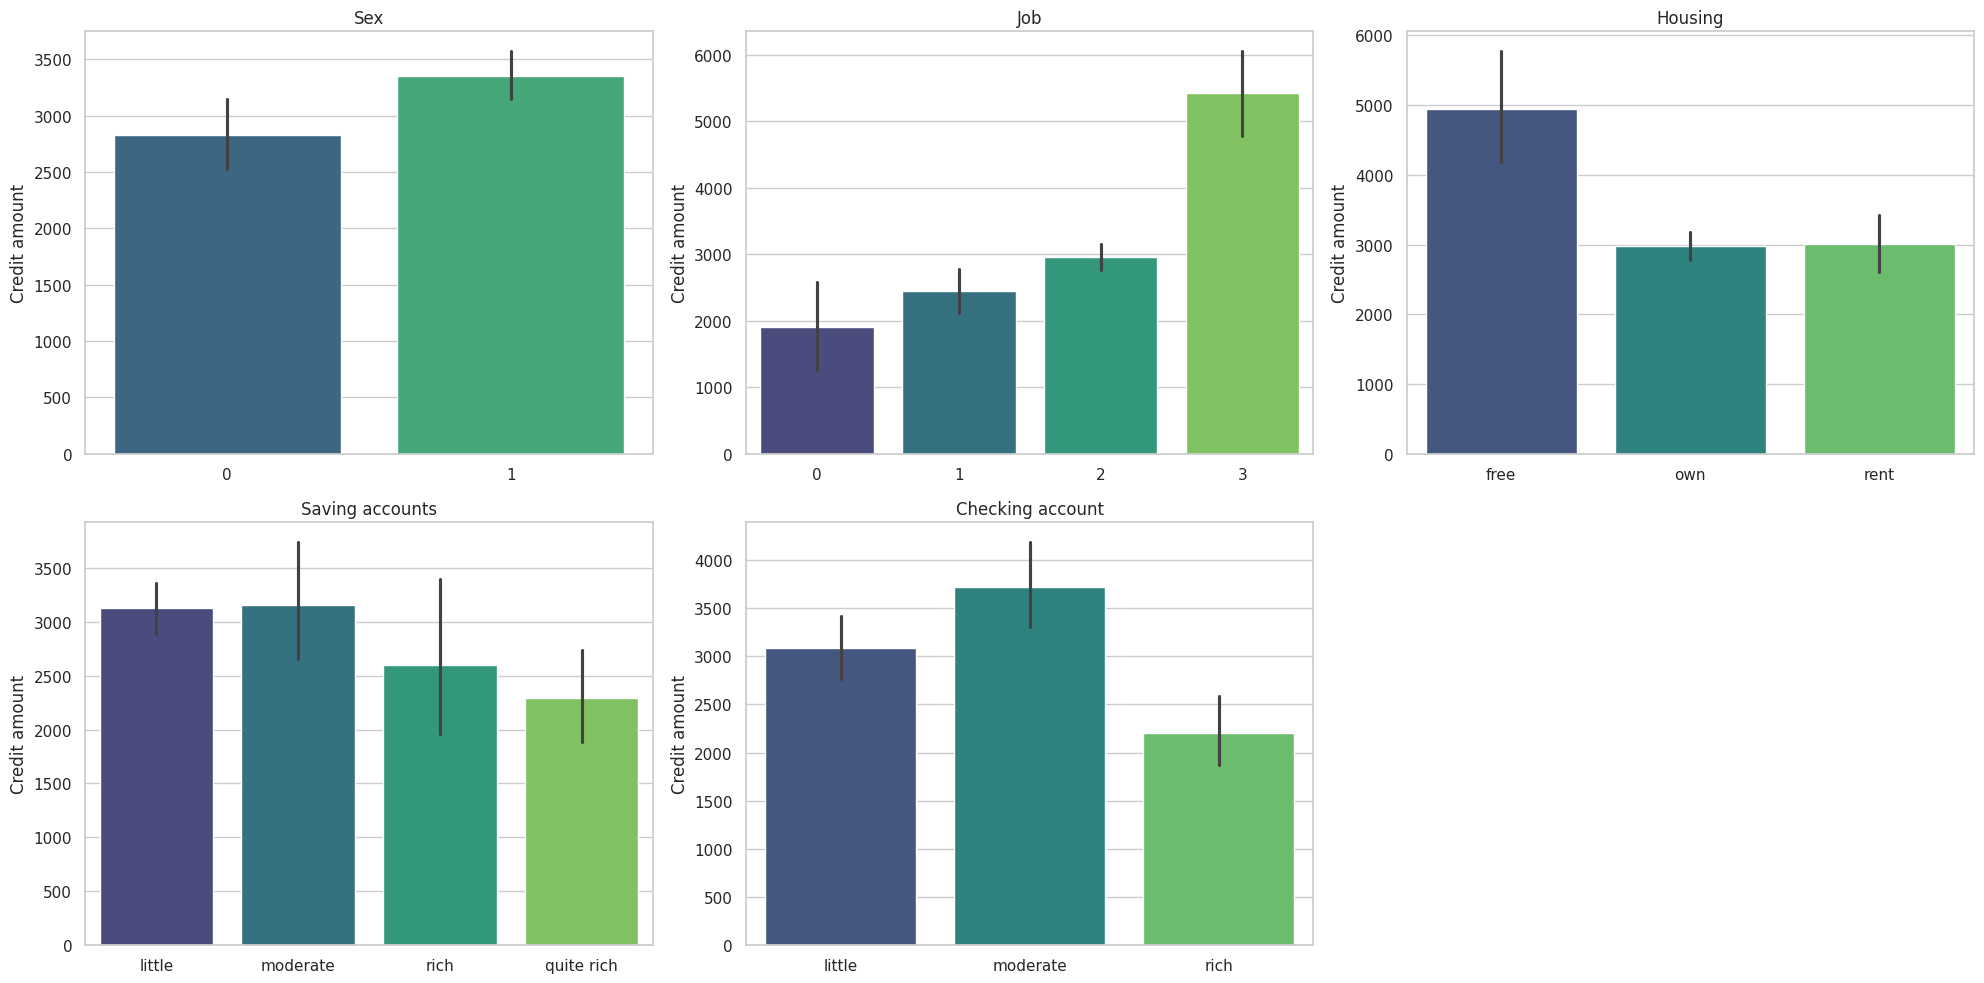

In [ ]:
sns_plots(data=train, features=countplot_barplot_features, barplot=True, barplot_y='Credit amount')

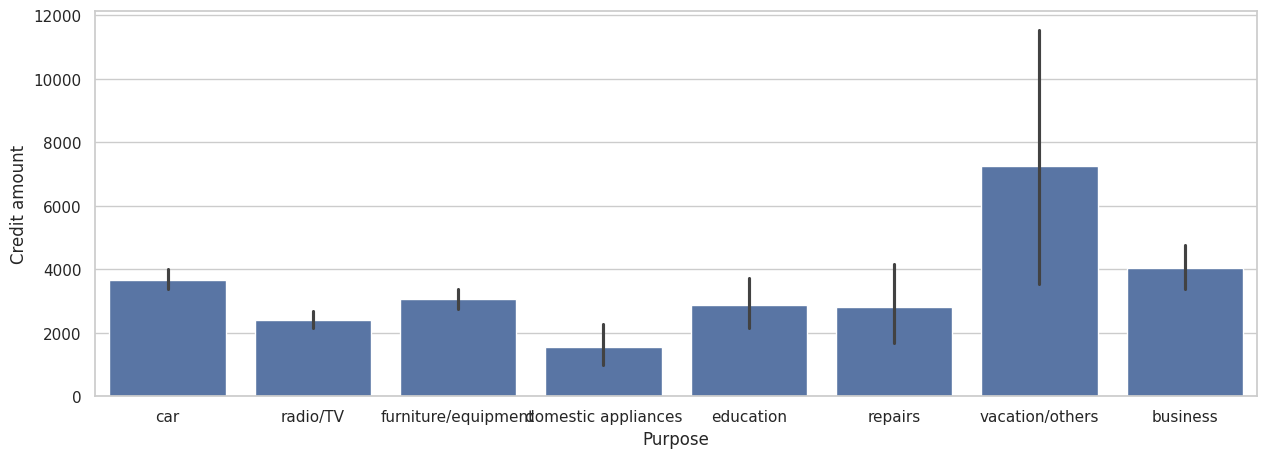

In [ ]:
# Plotting Purpose separately.
plt.figure(figsize=(15, 5))
sns.barplot(data=train, x='Purpose', y='Credit amount')
plt.show()

#### Categorical features vs Duration

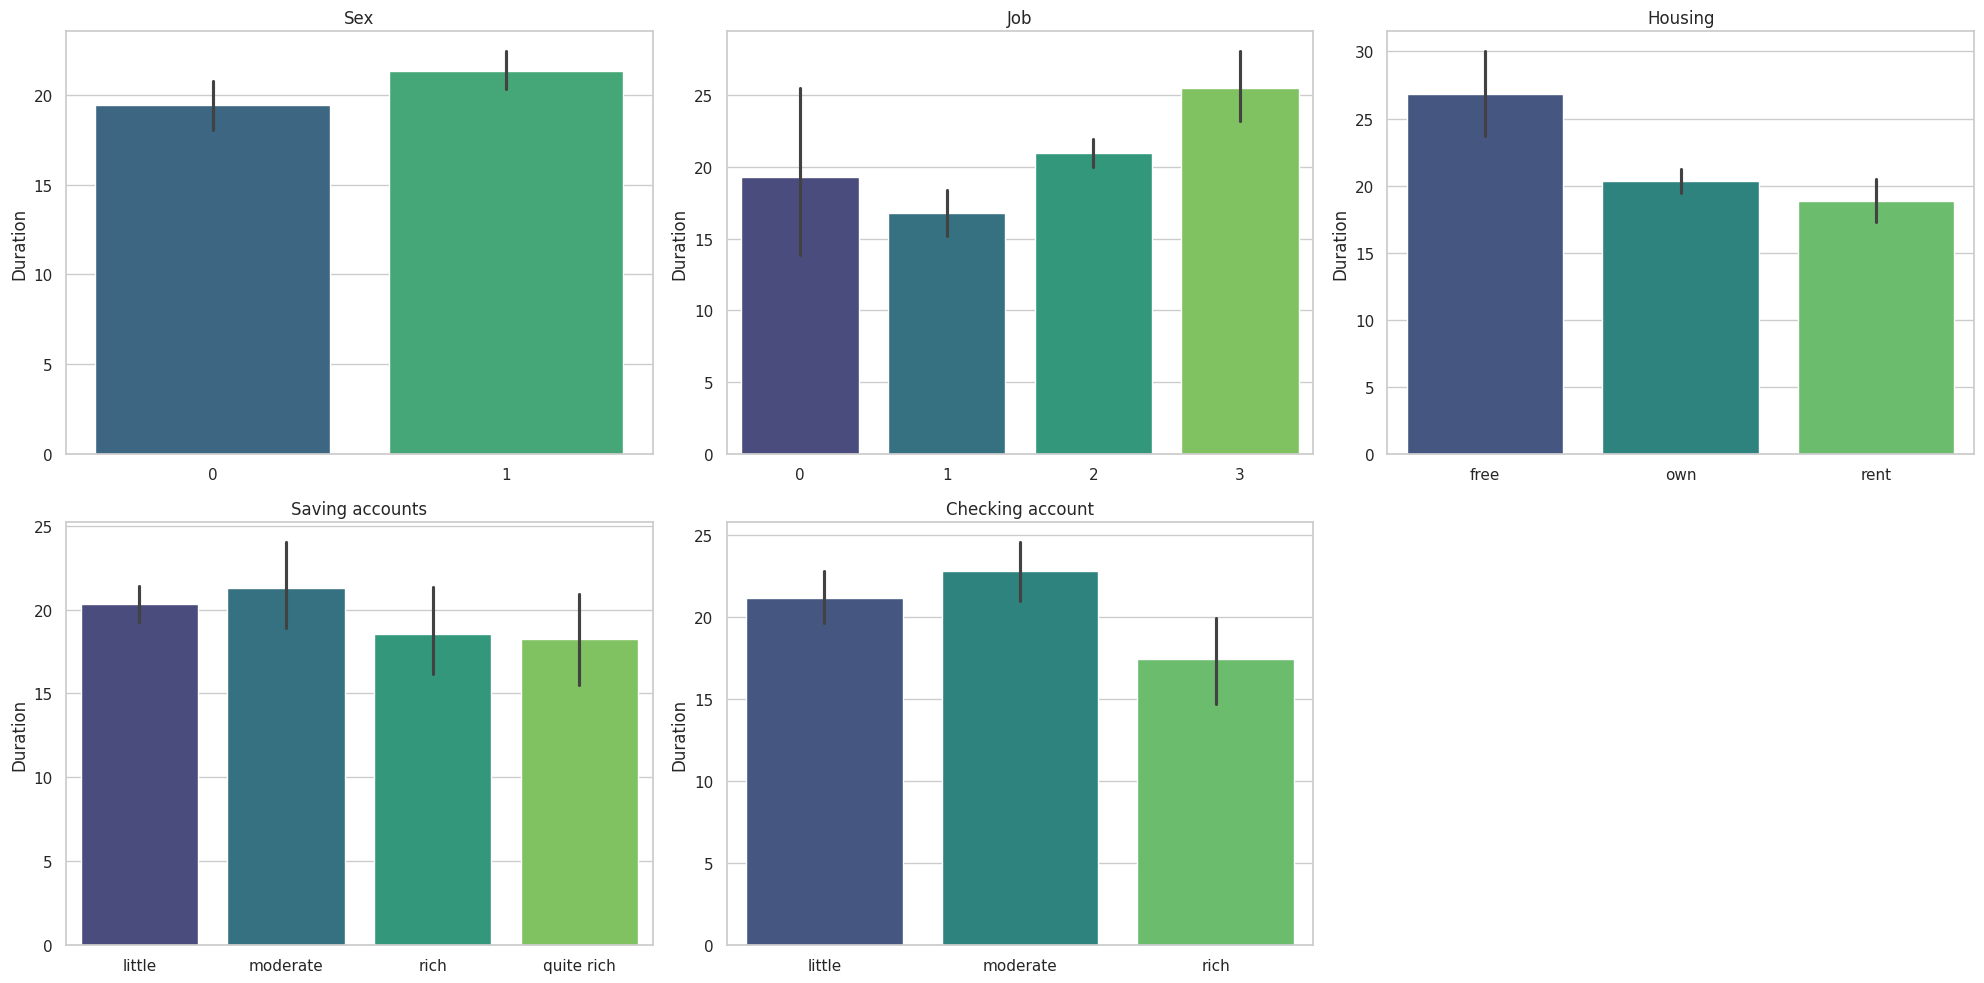

In [ ]:
sns_plots(data=train, features=countplot_barplot_features, barplot=True, barplot_y='Duration')

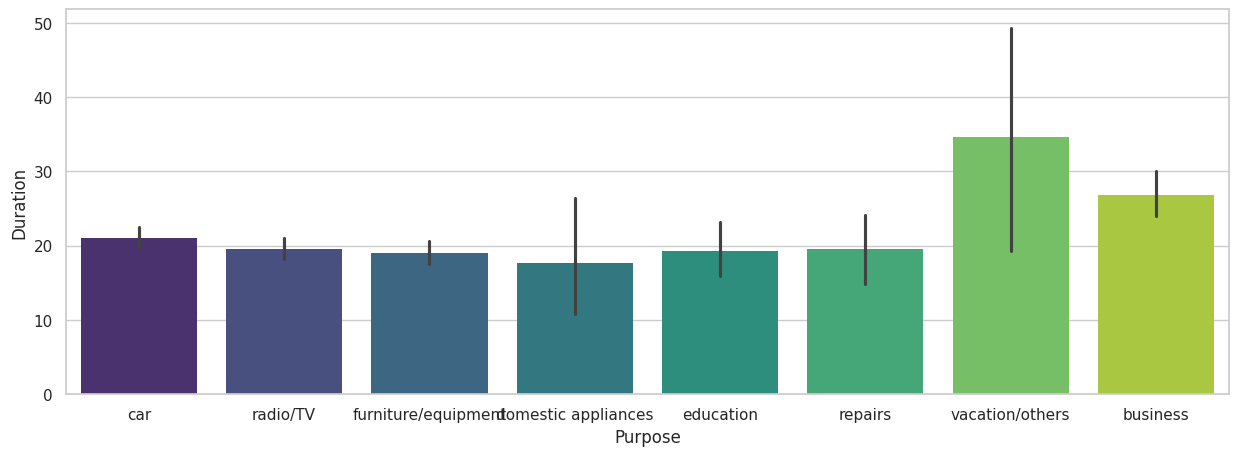

In [ ]:
# Plotting Purpose separately.
plt.figure(figsize=(15, 5))
sns.barplot(data=train, x='Purpose', y='Duration', linewidth=0, palette='viridis')
plt.show()

### Credit amount and Durations vs Risk

In [ ]:
amount_duration_risk = train.groupby(['Risk'], as_index=False).agg({'Credit amount': 'sum', 'Duration': 'mean'})
amount_duration_risk['Percentage'] = amount_duration_risk['Credit amount'] / amount_duration_risk['Credit amount'].sum()
amount_duration_risk

,Risk,Credit amount,Duration,Percentage
0,0,1650236,19.175000,0.646727
1,1,901437,24.491667,0.353273


### K-Means Clustering

### Age vs Duration clustering

In [ ]:
# Getting inertias of different number of clusters K K-Means models.

clustering_df = train[['Age', 'Duration']]

different_k_kmeans = [KMeans(n_clusters=k, random_state=42).fit(clustering_df) for k in range(1, 6)]
inertias = [model.inertia_ for model in different_k_kmeans]

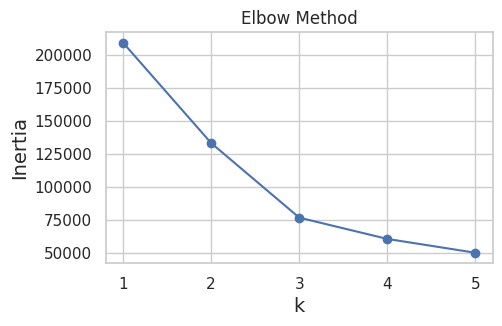

In [ ]:
# Plotting curve for elbow method.

plt.figure(figsize=(5, 3))
plt.title('Elbow Method')
plt.plot(range(1, 6), inertias, 'bo-')
plt.xlabel('k', fontsize=14)
plt.xticks(range(1, 6))
plt.ylabel('Inertia', fontsize=14)
plt.show()

Clearly, 3 is the optimal number of clusters by the elbow method.

In [ ]:
# Applying K-Means clustering with the optimal number of clusters.

k_means = KMeans(n_clusters=3)
k_means.fit(clustering_df)

KMeans(n_clusters=3)

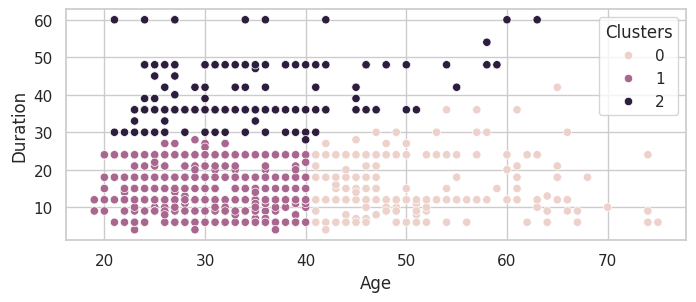

In [ ]:
# Plotting the clustering result.

clustering_df['Clusters'] = k_means.labels_

plt.figure(figsize=(8, 3))
sns.scatterplot(data=clustering_df, x='Age', y='Duration', hue='Clusters')
plt.show()

### Credit amount vs Duration clustering

In [ ]:
# Getting inertias of different number of clusters K K-Means models.

clustering_df = train[['Credit amount', 'Duration']]

different_k_kmeans = [KMeans(n_clusters=k, random_state=42).fit(clustering_df) for k in range(1, 6)]
inertias = [model.inertia_ for model in different_k_kmeans]

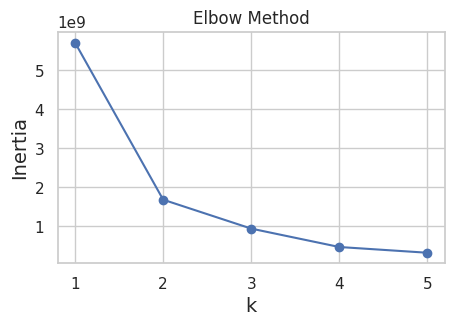

In [ ]:
# Plotting curve for elbow method.

plt.figure(figsize=(5, 3))
plt.title('Elbow Method')
plt.plot(range(1, 6), inertias, 'bo-')
plt.xlabel('k', fontsize=14)
plt.xticks(range(1, 6))
plt.ylabel('Inertia', fontsize=14)
plt.show()

Clearly, 2 is the optimal number of clusters by the elbow method.

In [ ]:
# Applying K-Means clustering with the optimal number of clusters.

k_means = KMeans(n_clusters=2)
k_means.fit(clustering_df)

KMeans(n_clusters=2)

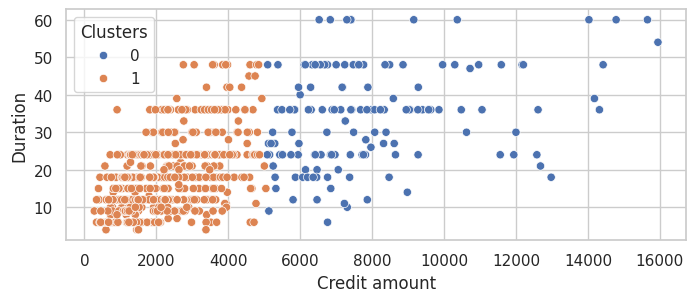

In [ ]:
# Plotting the clustering result.

clustering_df['Clusters'] = k_means.labels_

plt.figure(figsize=(8, 3))
sns.scatterplot(data=clustering_df, x='Credit amount', y='Duration', hue='Clusters')
plt.show()